# Predecir problemas de corazón basado en sus atributos médicos

Los pasos para completar este proyecto:


1.- Definir problema. Lo que estamos intentando es saber si podemos predecir si una persona tiene problemas cardiovasculares basandonos en sus atributos médicos.

2.- Conseguir la data. La data de este proyecto proviene de la clínica de Cleveland de Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+disease)


3.- Evaluación. 95% de precisión.

4.- Características de las variables.
    
    1.- age - age in years
    2.- sex - (1 = male; 0 = female)
    3.- cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    4.- trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
    5.- chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    6.- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
    7.- restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    8.- thalach - maximum heart rate achieved
    9.-  exang - exercise induced angina (1 = yes; 0 = no)
    10.- oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    11 .- slope - the slope of the peak exercise ST segment
            0: Upsloping: better heart rate with excercise (uncommon)
            1: Flatsloping: minimal change (typical healthy heart)
            2: Downslopins: signs of unhealthy heart
    12.- ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    13.- thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    14.- target - have disease or not (1=yes, 0=no) (= the predicted attribute)


In [958]:
#EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline
#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier as RFC

#Evaluación
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [709]:

df = pd.read_csv('heart.csv')
df.shape

(303, 15)

In [710]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    object 
dtypes: float64(4), int64(9), object(2)
memory usage: 35.6+ KB


In [711]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [712]:
df.isna().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      4
chol          1
fbs           0
restecg       0
thalach       5
exang         0
oldpeak       0
slope         0
ca            0
thal          0
target        0
dtype: int64

In [713]:
df.dropna(inplace=True)

In [714]:
#eliminamos la columna de Unnamed
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [715]:
df['target'].value_counts()

yes    160
no     133
Name: target, dtype: int64

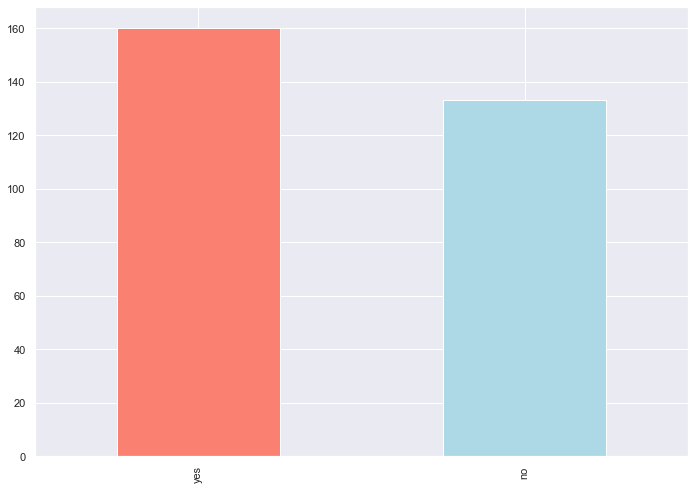

In [716]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [717]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,293.0,54.348123,9.182042,29.0,47.0,55.0,61.0,77.0
cp,293.0,0.965870,1.033114,0.0,0.0,1.0,2.0,3.0
trestbps,293.0,131.679181,17.658077,94.0,120.0,130.0,140.0,200.0
chol,293.0,246.177474,51.405545,126.0,211.0,240.0,275.0,564.0
fbs,293.0,0.146758,0.354470,0.0,0.0,0.0,0.0,1.0
restecg,293.0,0.518771,0.527162,0.0,0.0,1.0,1.0,2.0
thalach,293.0,149.880546,22.638525,71.0,134.0,152.0,167.0,202.0
exang,293.0,0.331058,0.471399,0.0,0.0,0.0,1.0,1.0
oldpeak,293.0,1.054266,1.173169,0.0,0.0,0.8,1.8,6.2
slope,293.0,1.392491,0.618946,0.0,1.0,1.0,2.0,2.0


In [801]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


# Un poco de EDA visual

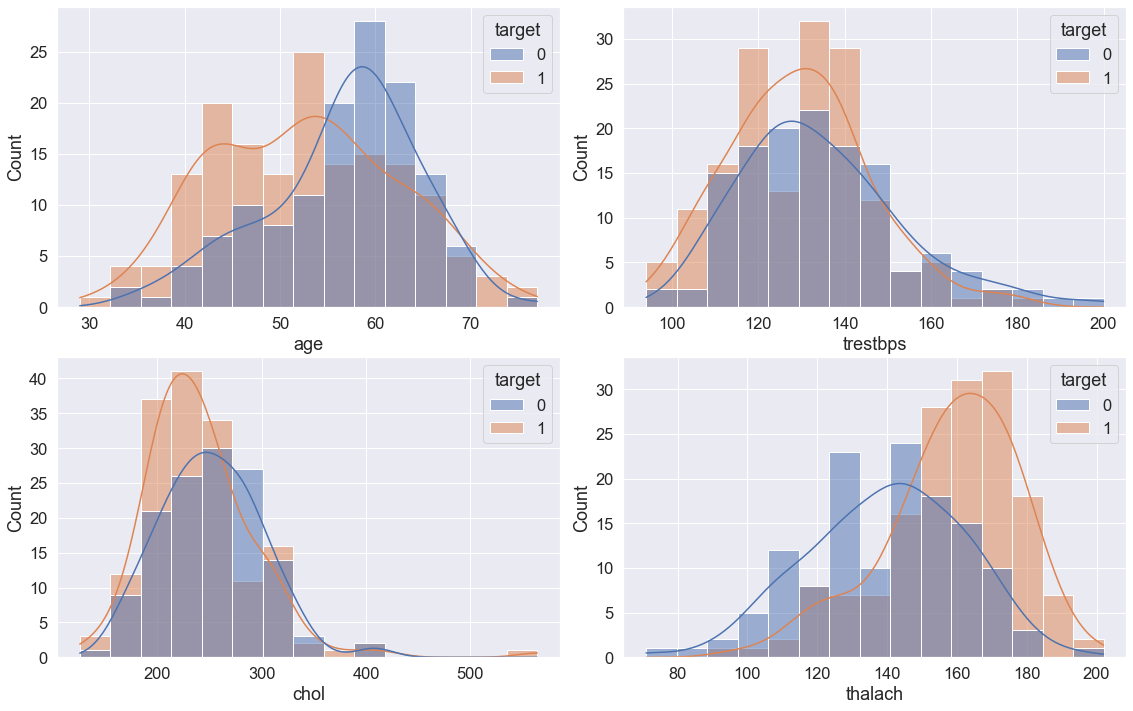

In [811]:
numeric_columns = df[['age', 'trestbps', 'chol', 'thalach']]






fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
plt.tight_layout()

for col, ax in zip(numeric_columns, axes.flatten()):
    sns.histplot(data=df, x=col, ax=ax, hue="target", kde=True, bins=15)

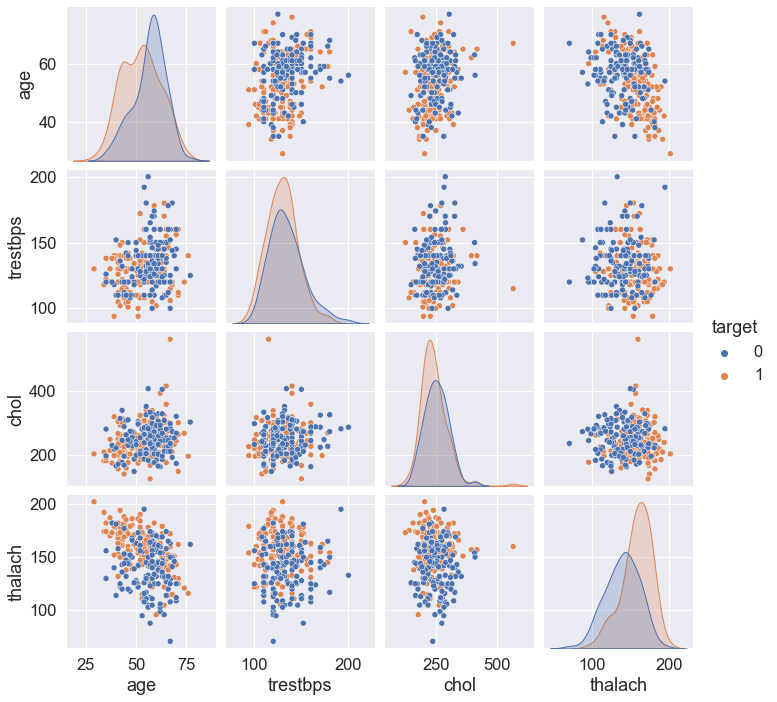

In [823]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach'] + ['target'] ], hue='target')


/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='age'>

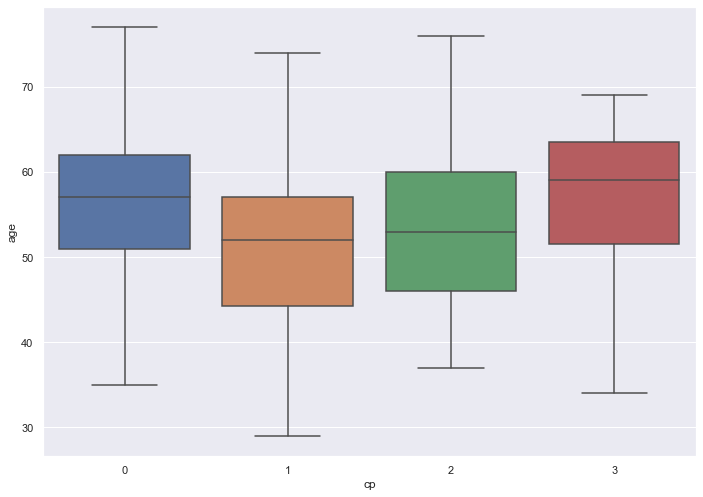

In [718]:
sns.boxplot(df.cp, df.age)

/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='thalach'>

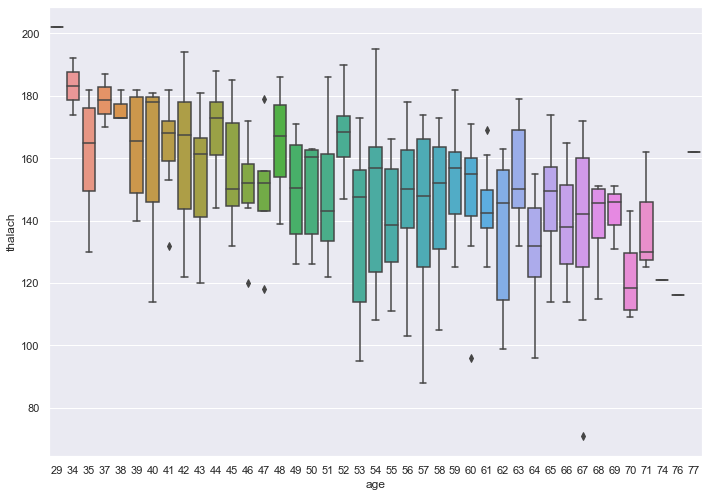

In [719]:
sns.boxplot(df.age, df.thalach)

/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='chol'>

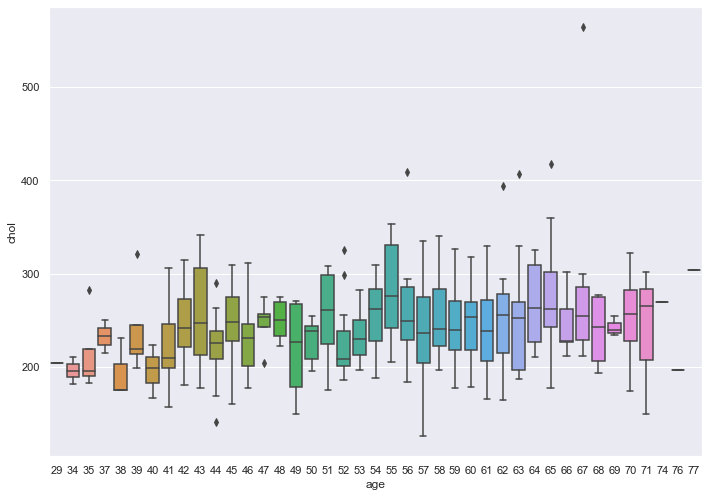

In [720]:
sns.boxplot(df.age, df.chol)

/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cp', ylabel='age'>

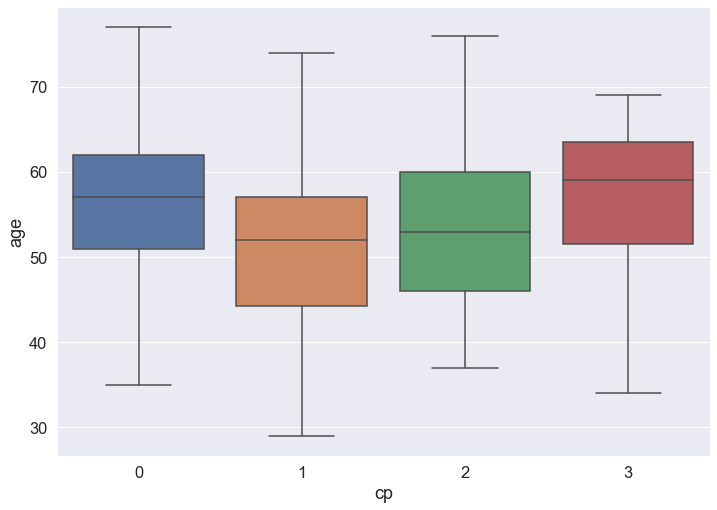

In [956]:
sns.boxplot(df.cp, df.age)

/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='age'>

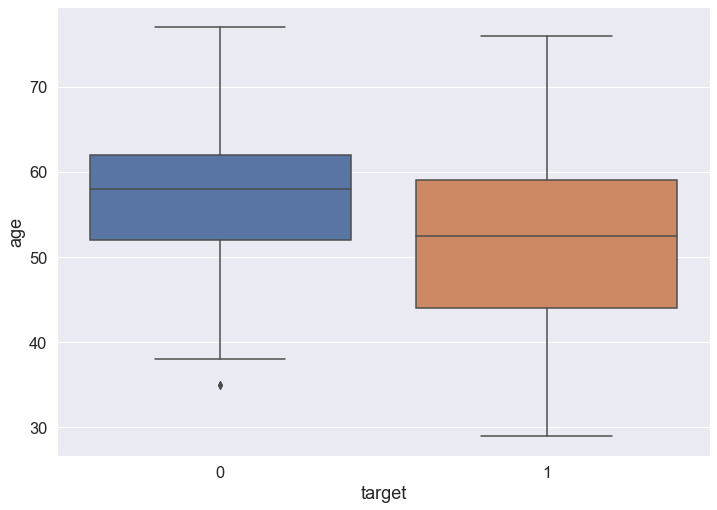

In [951]:
sns.boxplot(df.target, df.age)

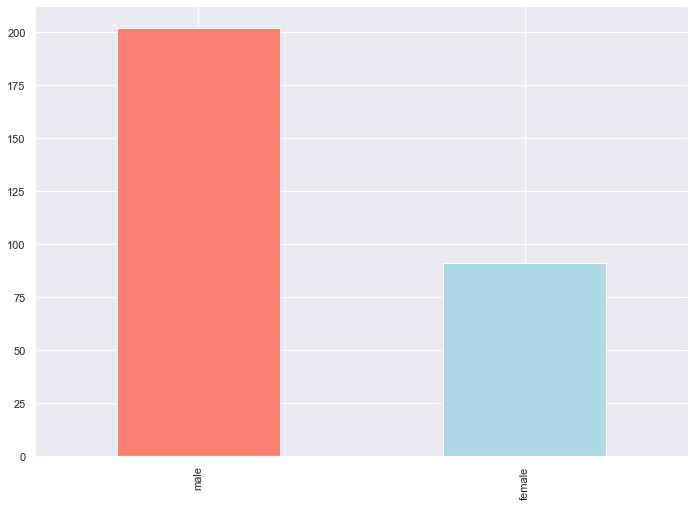

In [721]:
df['sex'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

Reemplazamos las columnas de sex y target por 0 y 1

In [722]:
df['sex'] = df['sex'].replace({'male':1, 'female':0})

In [723]:
df['target'] = df['target'].replace({'yes':1, 'no':0})

Comparar algunas columnas respecto al target

In [724]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,23,68
1,110,92


<AxesSubplot:xlabel='target'>

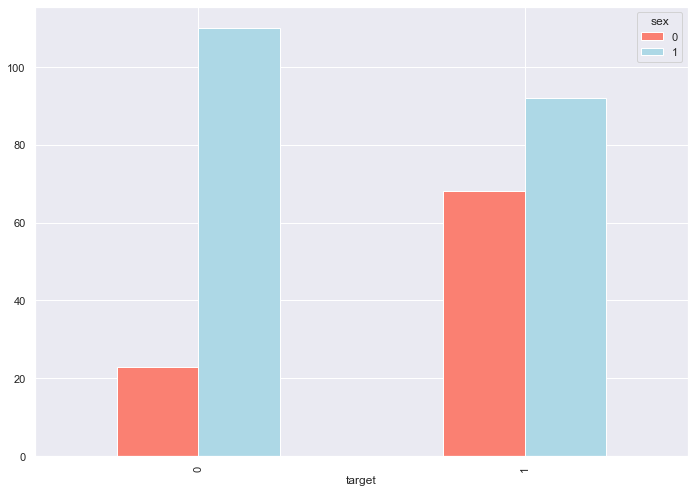

In [725]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', color = ['salmon', 'lightblue'])

# unos crosstabs visuales

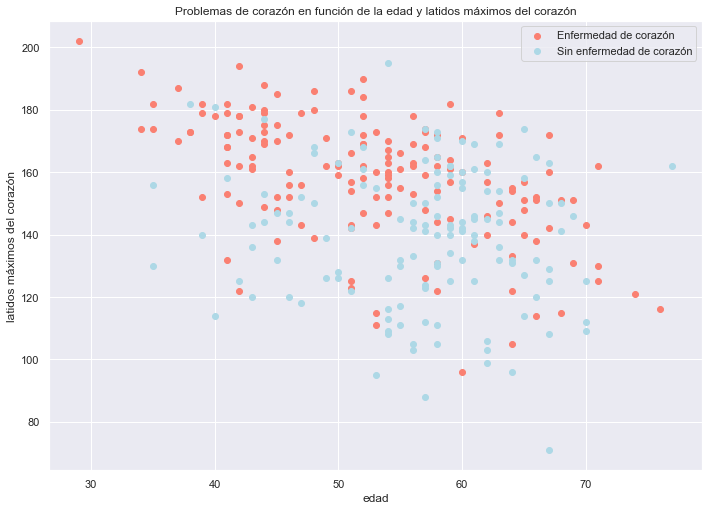

In [726]:
plt.figure()

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon')
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='lightblue')

plt.title('Problemas de corazón en función de la edad y latidos máximos del corazón')
plt.xlabel( 'edad')
plt.ylabel( 'latidos máximos del corazón')
plt.legend(['Enfermedad de corazón', 'Sin enfermedad de corazón']);

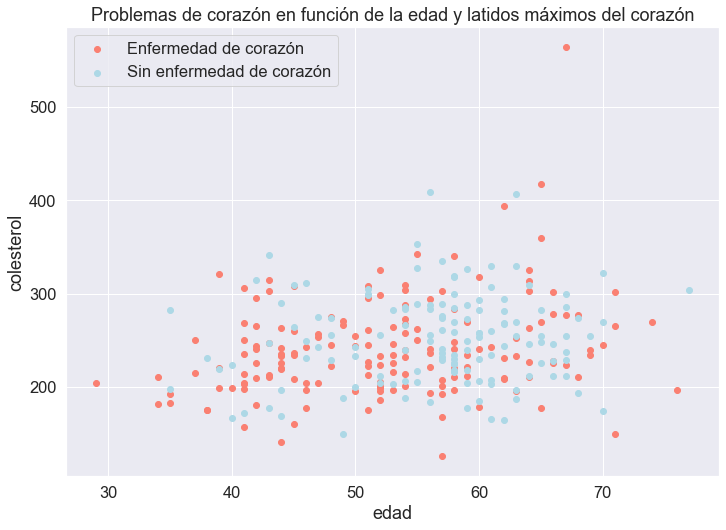

In [978]:
plt.figure()

plt.scatter(df.age[df.target==1], df.chol[df.target==1], c='salmon')
plt.scatter(df.age[df.target==0], df.chol[df.target==0], c='lightblue')

plt.title('Problemas de corazón en función de la edad y latidos máximos del corazón')
plt.xlabel( 'edad')
plt.ylabel( 'colesterol')
plt.legend(['Enfermedad de corazón', 'Sin enfermedad de corazón']);

In [727]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,101,37
1,9,41
2,16,66
3,7,16


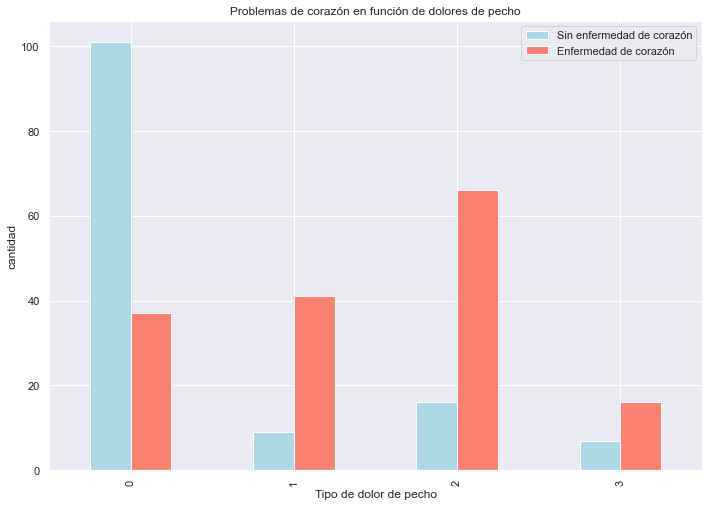

In [728]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color = ['lightblue', 'salmon'])


plt.title('Problemas de corazón en función de dolores de pecho')
plt.xlabel('Tipo de dolor de pecho')
plt.ylabel('cantidad')
plt.legend(['Sin enfermedad de corazón', 'Enfermedad de corazón'])

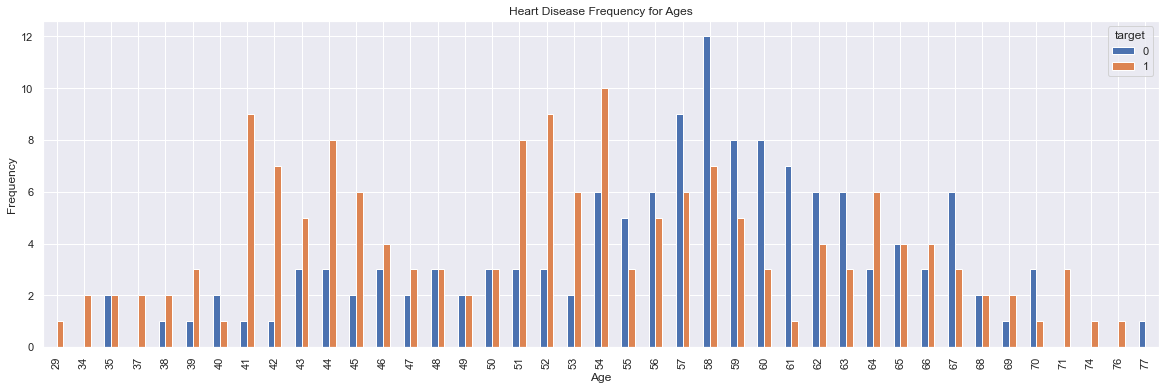

In [729]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Correlacion de las variables

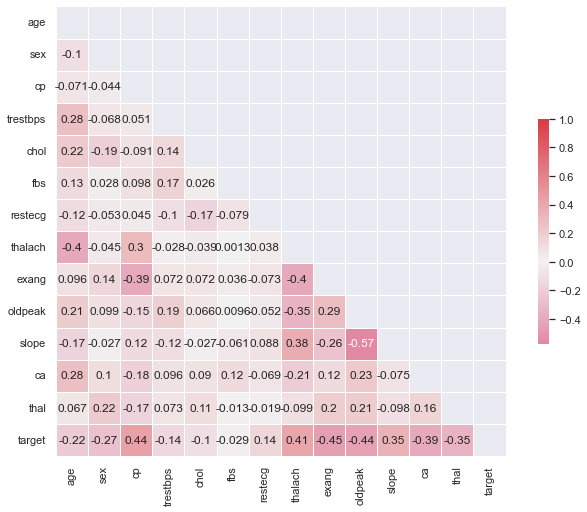

In [730]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
corr = df.corr()
mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores


cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores


sns.heatmap(corr,
            mask=mascara,
            cmap=cmap,
            vmax=1,
            center=0,
            square=True,
            linewidth=0.5,
            cbar_kws={'shrink': 0.5},
            annot=True
           );


# Empezamos creando modelos

In [731]:
X = df.drop('target', axis=1)
y = df['target']

In [732]:
np.random.seed(42)

In [733]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [734]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
217,63,1,0,130.0,330.0,1,0,132.0,1,1.8,2,3,3
236,58,1,0,125.0,300.0,0,0,171.0,0,0.0,2,2,3
233,64,1,0,120.0,246.0,0,0,96.0,1,2.2,0,1,2
76,51,1,2,125.0,245.0,1,0,166.0,0,2.4,1,0,2
27,51,1,2,110.0,175.0,0,1,123.0,0,0.6,2,0,2


In [735]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
87,46,1,1,101.0,197.0,1,1,156.0,0,0.0,2,0,3
268,54,1,0,122.0,286.0,0,0,116.0,1,3.2,1,2,2
47,47,1,2,138.0,257.0,0,0,156.0,0,0.0,2,0,2
182,61,0,0,130.0,330.0,0,0,169.0,0,0.0,2,0,2
148,44,1,2,120.0,226.0,0,1,169.0,0,0.0,2,0,2


In [736]:
y_train

217    0
236    0
233    0
76     1
27     1
      ..
194    0
74     1
110    1
278    0
106    1
Name: target, Length: 234, dtype: int64

In [737]:
y_test.shape

(59,)

# Vamos a probar con 3 modelos distintos: 
    1.- Regresion logistica
    2.- K-nearest neighbors
    3.- Random forest

In [1027]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

rf = RFC()
rf.fit(X_train, y_train)

kn = KNeighborsClassifier()
kn.fit(X_train, y_train)




scores= logreg.score(X_test, y_test), rf.score(X_test, y_test), kn.score(X_test, y_test)
scores

/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.7966101694915254, 0.864406779661017, 0.6101694915254238)

Analizamos los modelos visualmente


In [1028]:
scores_df = pd.DataFrame({'logistic regression':scores[0], 'random forest':scores[1], 'k neigbors':scores[2]}, index=['precision'])

<AxesSubplot:>

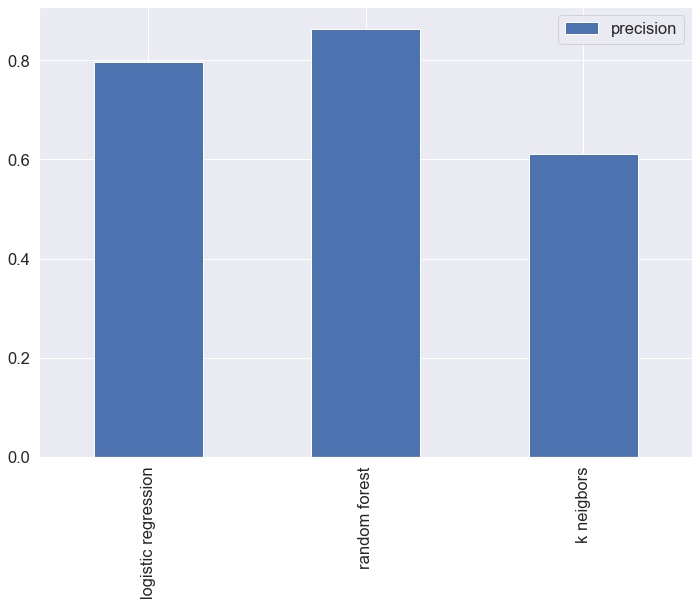

In [1029]:
scores_df.T.plot(kind='bar')

In [1030]:
'''

Hypyterparameter tuning
Feature importance
Confusion matrix
Cross-validation
Precision
Recall
F1 score
Classification report
ROC curve
Area under the curve (AUC)'''

'\n\nHypyterparameter tuning\nFeature importance\nConfusion matrix\nCross-validation\nPrecision\nRecall\nF1 score\nClassification report\nROC curve\nArea under the curve (AUC)'

In [1031]:

'''
Esto es para tunear el modelo de k-neighbors, aquí podemos ver cuál es el número óptimo de vecinos 
'''
train_scores = []
test_scores = []

# Vamos a iterar sobre 20 opciones
neighbors = range(1, 21)

# Activamos el modelo
knn = KNeighborsClassifier()

# Loop sobre los  n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
       
    knn.fit(X_train, y_train) 
   
    train_scores.append(knn.score(X_train, y_train))
    
    test_scores.append(knn.score(X_test, y_test))
    
train_scores

[1.0,
 0.7863247863247863,
 0.7564102564102564,
 0.7393162393162394,
 0.7606837606837606,
 0.7478632478632479,
 0.7478632478632479,
 0.7393162393162394,
 0.7393162393162394,
 0.7008547008547008,
 0.7136752136752137,
 0.6923076923076923,
 0.6709401709401709,
 0.6837606837606838,
 0.6709401709401709,
 0.6752136752136753,
 0.6794871794871795,
 0.6666666666666666,
 0.6709401709401709,
 0.6709401709401709]

In [1032]:
test_scores

[0.6271186440677966,
 0.576271186440678,
 0.6440677966101694,
 0.6440677966101694,
 0.6101694915254238,
 0.6610169491525424,
 0.6779661016949152,
 0.6440677966101694,
 0.6440677966101694,
 0.6610169491525424,
 0.7288135593220338,
 0.6779661016949152,
 0.6949152542372882,
 0.711864406779661,
 0.711864406779661,
 0.711864406779661,
 0.6949152542372882,
 0.711864406779661,
 0.7288135593220338,
 0.7288135593220338]

Score máximo en la data del test_score: 72.88%


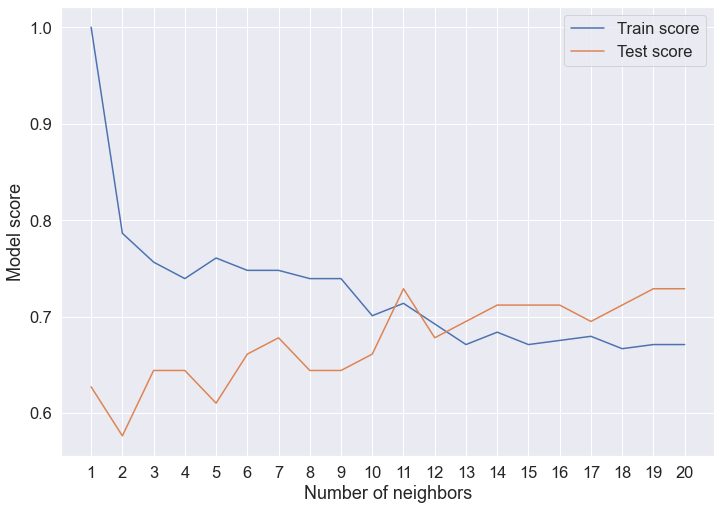

In [1033]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Score máximo en la data del test_score: {max(test_scores)*100:.2f}%")

# Ajustamos los hiperparámetros con RandomizedSearchCV y GridSearchCV  

In [1034]:
'''def grid(modelo, param, cv=5):
    
    g=GridSearchCV(modelo,  
                   param,   
                   cv=cv,   
                   return_train_score=True,  
                   n_jobs=-1)  
                  
    
    g.fit(X_train, y_train)
    
    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))
    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))
    print('Mejores parametros: {}'.format(g.best_params_))
    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))
    
    return g.best_estimator_.fit(X_train, y_train)  

param={'n_estimators': [10, 50, 100, 150, 500],
       'max_depth': [1, 5, 10, 15, 20]}



grid(rf, param)'''

"def grid(modelo, param, cv=5):\n    \n    g=GridSearchCV(modelo,  \n                   param,   \n                   cv=cv,   \n                   return_train_score=True,  \n                   n_jobs=-1)  \n                  \n    \n    g.fit(X_train, y_train)\n    \n    print('Acierto test: {:.2f}'.format(g.score(X_test, y_test)))\n    print('Acierto train: {:.2f}'.format(g.score(X_train, y_train)))\n    print('Mejores parametros: {}'.format(g.best_params_))\n    print('Mejor acierto cv: {:.2f}'.format(g.best_score_))\n    \n    return g.best_estimator_.fit(X_train, y_train)  \n\nparam={'n_estimators': [10, 50, 100, 150, 500],\n       'max_depth': [1, 5, 10, 15, 20]}\n\n\n\ngrid(rf, param)"

# Evaluaciones de los modelos mas allá de la precisión
    *ROC curve and AUC score
    *Confusion matrix
    *Classification report
    *Precision
    *Recall
    *F1-score


In [1035]:
# vemos que nuestro mejor modelo es el de random forest

y_preds_rf = rf.predict(X_test)


In [1036]:
y_preds_rf

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

/Users/alonsoherrera/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


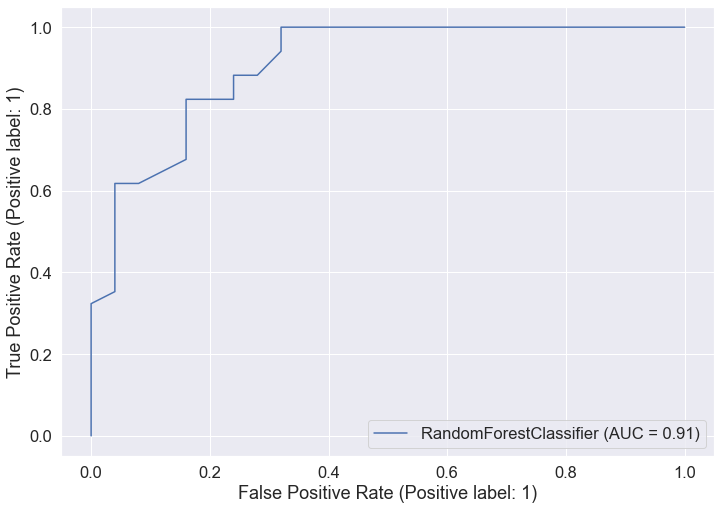

In [1037]:
plot_roc_curve(rf, X_test, y_test)


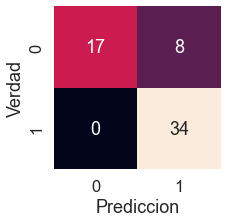

In [1074]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Prediccion")
    plt.ylabel("Verdad")
    

    
plot_conf_mat(y_test, y_preds_rf)


In [1060]:



'''


accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy = (34+17) / (34 + 17 + 8 + 0) ----> (51) / (59) -----> 0.86


De todos los que son verdad, cuantos predijo que son verdad
recall = tp / (tp+fn) 
recall = 34 / (34+ 0) ----->  1


De todos los que predijo que son verdad, cuantos en realidad son verdad
precision = tp / (tp+fp) 
precision = 34 / (34+ 8) ----->  0.81




''';
report =classification_report(y_test, y_preds_rf)

print(classification_report(y_test, y_preds_rf))


              precision    recall  f1-score   support

           0       1.00      0.68      0.81        25
           1       0.81      1.00      0.89        34

    accuracy                           0.86        59
   macro avg       0.90      0.84      0.85        59
weighted avg       0.89      0.86      0.86        59



# importancia de las variables

In [1015]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,1,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [1016]:
rf.feature_importances_

array([0.07973507, 0.03158224, 0.12341349, 0.07547472, 0.06834572,
       0.00838117, 0.02451867, 0.12589323, 0.07534035, 0.13381133,
       0.04673685, 0.10276868, 0.10399849])

In [1017]:
dictio2 = dict(zip(df.columns, list(rf.feature_importances_)))
dictio2

{'age': 0.07973506818831874,
 'sex': 0.03158224020661949,
 'cp': 0.12341348612635338,
 'trestbps': 0.07547472272526515,
 'chol': 0.06834572331722583,
 'fbs': 0.008381166258533,
 'restecg': 0.02451866537010394,
 'thalach': 0.12589322938500708,
 'exang': 0.0753403528614481,
 'oldpeak': 0.1338113277391368,
 'slope': 0.046736845783246724,
 'ca': 0.10276868083553571,
 'thal': 0.10399849120320613}

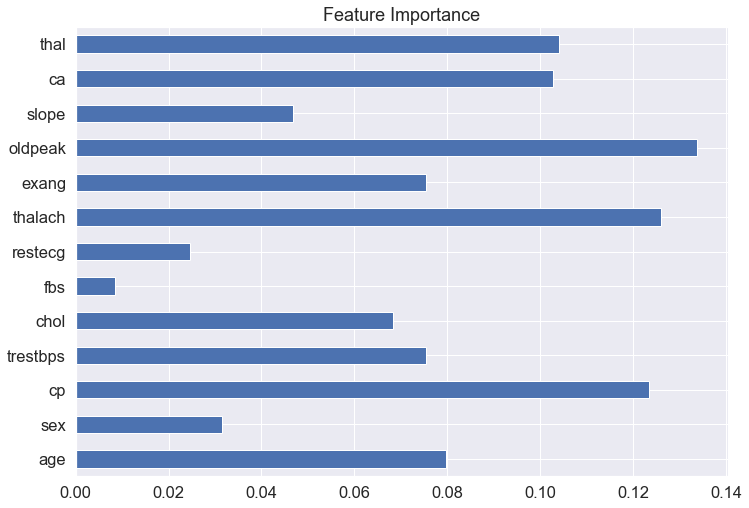

In [1018]:
feature_df = pd.DataFrame(dictio2, index=[0])
feature_df.T.plot.barh(title="Feature Importance", legend=False);

In [1019]:
# impo : Chest-Pain, Maximum-Heart-Rate, oldpeak

# nimpo : sex, chol, fasting-blood-sugar, slope


Accuracy

In [1083]:
# el accuracy es de cada 100, cuantos aciertos tuvo



rf_acc = float(rf.score(X_test, y_test))

rf.score(X_test, y_test)

0.864406779661017

Precisión

In [1084]:
from sklearn.metrics import precision_score as prec

In [1085]:
# la precision es el porcentaje de aciertos que tuvo en los positivos

rf_prec = float(prec(y_test, y_preds_rf))


print(prec(y_test, y_preds_rf))


0.8095238095238095


Recall

In [1086]:
# recall es cuantos positivos fueron acertados sobre el total de los positivos

from sklearn.metrics import recall_score as rec

recall = float(recall_score(y_test, y_preds_rf, average='binary'))

recall

1.0

f1

In [1088]:


from sklearn.metrics import f1_score as f1

f1(y_test, y_preds_rf)

f1 = float(f1(y_test, y_preds_rf))

f1

0.8947368421052632

<AxesSubplot:>

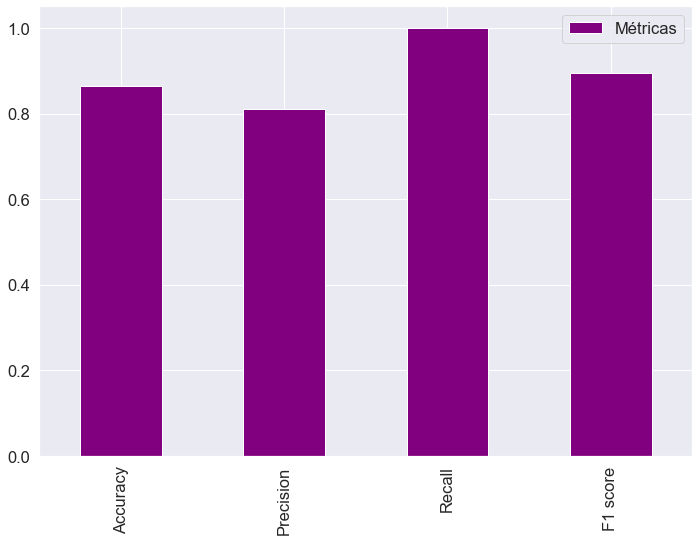

In [1104]:
valuations = rf_acc, rf_prec, recall, f1


valuations_df = pd.DataFrame({'Accuracy':rf_acc, 'Precision':rf_prec, 'Recall':recall, 'F1 score':f1}, index=['Métricas'])

valuations_df.T.plot(kind='bar', color='purple')



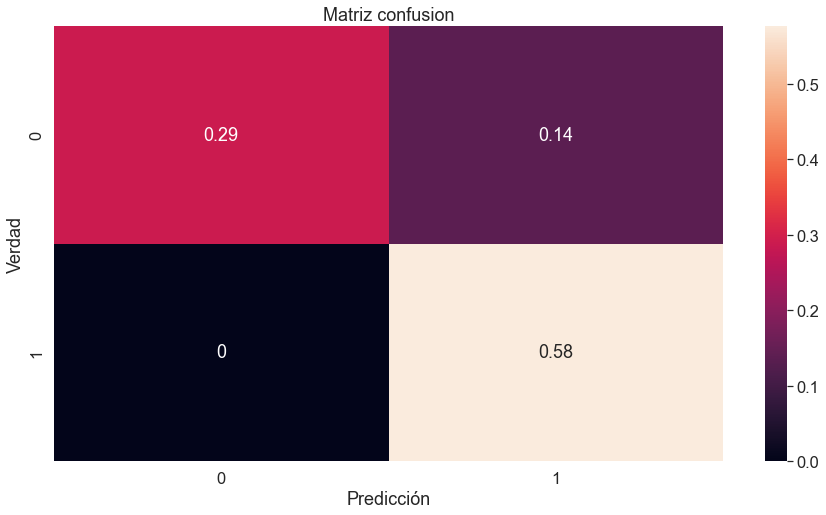

In [1075]:
# un confusion matrix en porcentajes

'''

esto quiere decir que el 87 porciento de las predicciones son correctas pero el 14 porciento.

'''


plt.figure(figsize=(15, 8))

ax=sns.heatmap(confusion_matrix(y_test, y_preds_rf)/sum(sum(confusion_matrix(y_test, y_preds_rf))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Predicción')
plt.show();



